In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [123]:
class Perceptron:
    
    def __init__(self, w=np.array([])):
        """ Can optionally input the weight array on Perceptron instantiaion.
        """
        self._w = np.array(w, dtype='float64')
    
    def predictSign(self, x):
        """ Given an input vector x, predict the output.
        """
        a = self.predictSignal(x)
        
        pred = np.sign(a)
        # Ensure 0 is not an optional classificaiton.
        if pred == 0:
            pred = 1
        
        return pred
    
    def predictSignal(self, x):
        
        x = np.array(x)
        
        # Take dot product of weight column vector w and input row vector x (both of 3 elements).
        return np.dot(self._w, x)
    
    def calcError(self, D):
        ''' Given a dataset D formatted as expected in class PLA,
        calculate number of misclassifications with current weights.
        '''
        xDim = len(D[0]) - 2
        numData = len(D)
        
        error = 0
        for i in range(0, numData):
            # Add to the error count for this data point if it's incorrectly classified
            if self.predictSign(D[i, 0:xDim+1]) != D[i, xDim+1]:
                error += 1/numData
        
        return error
    
    def setWeights(self, w):
        self._w = w
    
    def getWeights(self):
        return self._w

In [71]:
def genData(N, wTarget, xDim=2):
    
    # Assume we want an equal number of positively as negatively classified points.
    NPos = N/2
    NNeg = N - NPos

    # Initialize perceptron to test where input should fall relative to target function.
    percy = Perceptron(wTarget)

    # Initialize array to hold data (x values and classification).
    D = []

    # Generate data with positive classifications.
    posCount = 0
    while (posCount < NPos):
        # Generate data point.
        # Initial 1 is to match bias weight.
        d = [1]
        # Generate a value for each dimension of the input.
        for i in range(0, xDim):
            d.append(np.random.uniform(-2,2))
        # Append the positive classification.
        d.append(1)

        # Check if data point is positive as per target function.
        pred = percy.predictSign(d[0:xDim+1])

        if (pred == 1):
            D.append(d)
            posCount += 1

    # Generate data with negative classifications.
    negCount = 0
    while (negCount < NNeg):
        # Generate data point.
        # Initial 1 is to match bias weight.
        d = [1]
        # Generate a value for each dimension of the input.
        for i in range(0, xDim):
            d.append(np.random.uniform(-2,2))
        # Append the positive classification.
        d.append(-1)

        # Check if data point is negative as per target function.
        pred = percy.predictSign(d[0:xDim+1])

        if (pred == -1):
            D.append(d)
            negCount += 1

    return np.array(D)

In [81]:
class PLA:
    
    def __init__(self, percy, D, eta, cutoff):
        """ Provide a perceptron object and data on which to train its weights, as well as a learning rate and cutoff.
        """
        self._percy = percy
        self._D = D
        self._xDim = len(self._D[0]) - 2
        self._numUpdates = 0
        
        # Eta is the learning rate.
        self._eta = np.float64(eta)
        
        # Cutoff is the maximum number of updates allowed.
        self._cutoff = cutoff
    
    def isMisclassified(self, d):
        """ Return True if point is misclassified, false otherwise.
        """
        if (self._percy.predictSign(d[0:self._xDim+1]) != d[self._xDim+1]):
            return True
        
        else:
            return False
    
    def run(self):
        
        # Iterate over data points, adjusting weights upon finding misclassifications.
        misclassified = True
        while misclassified:
            
            d = np.float64(self._D[np.random.randint(0, len(self._D)-1)])
            
            if self.isMisclassified(d):
                # Perform weight update.
                w = self._percy.getWeights()
                
                s = np.float64(self._percy.predictSignal(d[0:3]))
                
                # New update rule accounts for difference between label y and signal s.
                wNew = np.float64(w + (self._eta*(d[self._xDim+1] - s)*d[0:self._xDim+1]))
                
                self._percy.setWeights(np.float64(wNew))
                
                self._numUpdates += 1
            
            # If all points are correctly classified, then we can terminate.
            for i in range(0, len(self._D)):
                if self.isMisclassified(self._D[i]):
                    break
                # Points are all correctly classified if we have not broken the loop after iterating over all examples.
                elif i == len(self._D) - 1:
                    misclassified = False
            
            # If as many updates have been performed as the cutoff, stop training.
            if (self._numUpdates >= self._cutoff):
                break
    
    def getNumUpdates(self):
        return self._numUpdates
        

In [159]:
np.random.seed(5)
wTarg = np.random.uniform(-2,2, 3)

In [160]:
# 1.5 a) Generate training and testing data. Assume input dimension of 2.
trainD = genData(N=100, wTarget=wTarg, xDim=2)
testD = genData(N=10000, wTarget=wTarg, xDim=2)

In [161]:
# 1.5 a) Run PLA with eta=100 on training data for max of 100 updates.

# Initialize random weights.
wInit = np.random.uniform(-2,2, 3)
print("Initial random weights: " + str(wInit))

# Initialize and train perceptron.
percy = Perceptron(wInit)

pla = PLA(percy, trainD, eta=100, cutoff=100)
pla.run()
wHypoth = percy.getWeights()

print("Number of updates: " + str(pla.getNumUpdates()))
print("Weights after PLA: " + str(wHypoth))
print("Target weights: " + str(wTarg))

Initial random weights: [-0.58986049 -0.30374103  1.3290752 ]
Number of updates: 100
Weights after PLA: [-1.02496552e+192  1.75447004e+191  6.44257451e+191]
Target weights: [-1.11202732  1.48292922 -1.17312338]


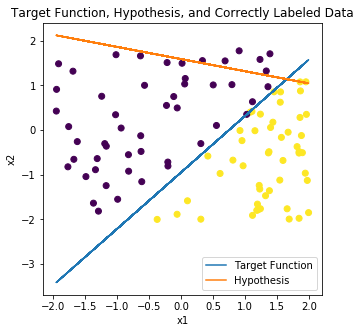

In [162]:
# 1.5 a) Plot results.
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

ax.set_title("Target Function, Hypothesis, and Correctly Labeled Data")
ax.set_ylabel("x2")
ax.set_xlabel("x1")

# Plot data points and labels.
ax.scatter(trainD[:,1], trainD[:,2], c=trainD[:,3])

# Plot target function.
tf = lambda d: (- wTarg[0] - wTarg[1]*d[1])/wTarg[2]
tf = map(tf, trainD)
ax.plot(trainD[:,1], list(tf), label="Target Function")

# Plot hypothesis.
g = lambda d: (- wHypoth[0] - wHypoth[1]*d[1])/wHypoth[2]
g = map(g, trainD)
ax.plot(trainD[:,1], list(g), label="Hypothesis")
ax.legend()

In [163]:
# 1.5 a) Report test error.
percy.calcError(testD)

0.5607999999999546

Initial random weights: [-0.4535203   0.65055756 -0.76823163]
Number of updates: 80
Weights after PLA: [-53.91328831  69.96572352 -50.92424345]
Target weights: [-1.11202732  1.48292922 -1.17312338]


0.019799999999999936

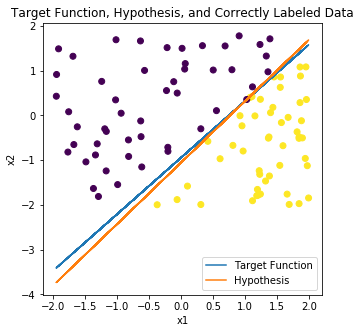

In [181]:
# 1.5 b) Run PLA with eta=1 on part a training data for max of 1000 updates. Evaluate on part a test data.

# Initialize random weights.
wInit = np.random.uniform(-2,2, 3)
print("Initial random weights: " + str(wInit))

# Initialize and train perceptron.
percy = Perceptron(wInit)

pla = PLA(percy, trainD, eta=1, cutoff=1000)
pla.run()
wHypoth = percy.getWeights()

print("Number of updates: " + str(pla.getNumUpdates()))
print("Weights after PLA: " + str(wHypoth))
print("Target weights: " + str(wTarg))

# Plot results.
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

ax.set_title("Target Function, Hypothesis, and Correctly Labeled Data")
ax.set_ylabel("x2")
ax.set_xlabel("x1")

# Plot data points and labels.
ax.scatter(trainD[:,1], trainD[:,2], c=trainD[:,3])

# Plot target function.
tf = lambda d: (- wTarg[0] - wTarg[1]*d[1])/wTarg[2]
tf = map(tf, trainD)
ax.plot(trainD[:,1], list(tf), label="Target Function")

# Plot hypothesis.
g = lambda d: (- wHypoth[0] - wHypoth[1]*d[1])/wHypoth[2]
g = map(g, trainD)
ax.plot(trainD[:,1], list(g), label="Hypothesis")
ax.legend()

# Report test error.
percy.calcError(testD)

Initial random weights: [1.13342077 1.91867219 0.0931647 ]
Number of updates: 164
Weights after PLA: [-0.57167249  0.77936224 -0.6553001 ]
Target weights: [-1.11202732  1.48292922 -1.17312338]


0.0093

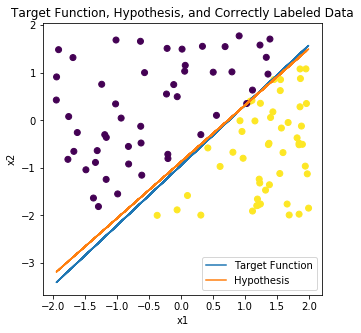

In [165]:
# 1.5 c) Run PLA with eta=0.01 on part a training data for max of 1000 updates. Evaluate on part a test data.

# Initialize random weights.
wInit = np.random.uniform(-2,2, 3)
print("Initial random weights: " + str(wInit))

# Initialize and train perceptron.
percy = Perceptron(wInit)

pla = PLA(percy, trainD, eta=0.01, cutoff=1000)
pla.run()
wHypoth = percy.getWeights()

print("Number of updates: " + str(pla.getNumUpdates()))
print("Weights after PLA: " + str(wHypoth))
print("Target weights: " + str(wTarg))

# Plot results.
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

ax.set_title("Target Function, Hypothesis, and Correctly Labeled Data")
ax.set_ylabel("x2")
ax.set_xlabel("x1")

# Plot data points and labels.
ax.scatter(trainD[:,1], trainD[:,2], c=trainD[:,3])

# Plot target function.
tf = lambda d: (- wTarg[0] - wTarg[1]*d[1])/wTarg[2]
tf = map(tf, trainD)
ax.plot(trainD[:,1], list(tf), label="Target Function")

# Plot hypothesis.
g = lambda d: (- wHypoth[0] - wHypoth[1]*d[1])/wHypoth[2]
g = map(g, trainD)
ax.plot(trainD[:,1], list(g), label="Hypothesis")
ax.legend()

# Report test error.
percy.calcError(testD)

Initial random weights: [ 1.76945069  1.90965588 -0.90635038]
Number of updates: 1000
Weights after PLA: [ 1.51536461  1.83327546 -0.99278725]
Target weights: [-1.11202732  1.48292922 -1.17312338]


0.28389999999998505

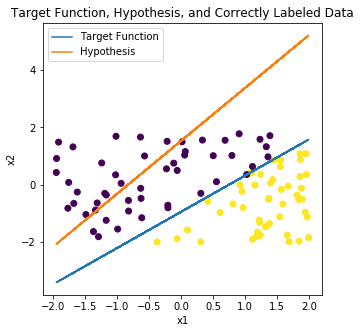

In [182]:
# 1.5 d) Run PLA with eta=0.0001 on part a training data for max of 1000 updates. Evaluate on part a test data.

# Initialize random weights.
wInit = np.random.uniform(-2,2, 3)
print("Initial random weights: " + str(wInit))

# Initialize and train perceptron.
percy = Perceptron(wInit)

pla = PLA(percy, trainD, eta=0.0001, cutoff=1000)
pla.run()
wHypoth = percy.getWeights()

print("Number of updates: " + str(pla.getNumUpdates()))
print("Weights after PLA: " + str(wHypoth))
print("Target weights: " + str(wTarg))

# Plot results.
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

ax.set_title("Target Function, Hypothesis, and Correctly Labeled Data")
ax.set_ylabel("x2")
ax.set_xlabel("x1")

# Plot data points and labels.
ax.scatter(trainD[:,1], trainD[:,2], c=trainD[:,3])

# Plot target function.
tf = lambda d: (- wTarg[0] - wTarg[1]*d[1])/wTarg[2]
tf = map(tf, trainD)
ax.plot(trainD[:,1], list(tf), label="Target Function")

# Plot hypothesis.
g = lambda d: (- wHypoth[0] - wHypoth[1]*d[1])/wHypoth[2]
g = map(g, trainD)
ax.plot(trainD[:,1], list(g), label="Hypothesis")
ax.legend()

# Report test error.
percy.calcError(testD)

Initial random weights: [1.85677228 0.7839937  0.84432498]
Number of updates: 95
Weights after PLA: [-59980171.11959267  77176781.8765654  -54741436.97938728]
Target weights: [-1.11202732  1.48292922 -1.17312338]


0.025299999999999902

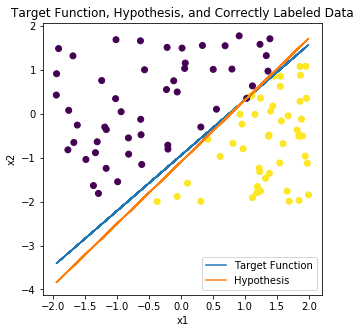

In [177]:
# 1.5 b) Run PLA with eta=1 on part a training data for max of 1000 updates. Evaluate on part a test data.
# REPEAT WITH CUTOFF = 100

# Initialize random weights.
wInit = np.random.uniform(-2,2, 3)
print("Initial random weights: " + str(wInit))

# Initialize and train perceptron.
percy = Perceptron(wInit)

pla = PLA(percy, trainD, eta=1, cutoff=100)
pla.run()
wHypoth = percy.getWeights()

print("Number of updates: " + str(pla.getNumUpdates()))
print("Weights after PLA: " + str(wHypoth))
print("Target weights: " + str(wTarg))

# Plot results.
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

ax.set_title("Target Function, Hypothesis, and Correctly Labeled Data")
ax.set_ylabel("x2")
ax.set_xlabel("x1")

# Plot data points and labels.
ax.scatter(trainD[:,1], trainD[:,2], c=trainD[:,3])

# Plot target function.
tf = lambda d: (- wTarg[0] - wTarg[1]*d[1])/wTarg[2]
tf = map(tf, trainD)
ax.plot(trainD[:,1], list(tf), label="Target Function")

# Plot hypothesis.
g = lambda d: (- wHypoth[0] - wHypoth[1]*d[1])/wHypoth[2]
g = map(g, trainD)
ax.plot(trainD[:,1], list(g), label="Hypothesis")
ax.legend()

# Report test error.
percy.calcError(testD)

Initial random weights: [-1.32712974 -1.73889326 -0.33070134]
Number of updates: 8542
Weights after PLA: [-0.31312794  0.42991025 -0.36405666]
Target weights: [-1.11202732  1.48292922 -1.17312338]


0.010399999999999993

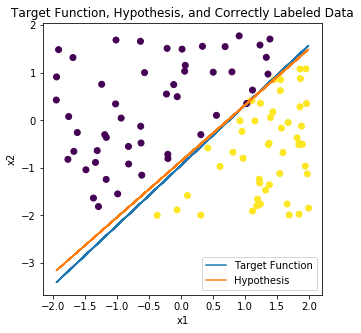

In [184]:
# 1.5 d) Run PLA with eta=0.0001 on part a training data for max of 1000 updates. Evaluate on part a test data.
# REPEAT WITH CUTOFF = 10000

# Initialize random weights.
wInit = np.random.uniform(-2,2, 3)
print("Initial random weights: " + str(wInit))

# Initialize and train perceptron.
percy = Perceptron(wInit)

pla = PLA(percy, trainD, eta=0.0001, cutoff=100000)
pla.run()
wHypoth = percy.getWeights()

print("Number of updates: " + str(pla.getNumUpdates()))
print("Weights after PLA: " + str(wHypoth))
print("Target weights: " + str(wTarg))

# Plot results.
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

ax.set_title("Target Function, Hypothesis, and Correctly Labeled Data")
ax.set_ylabel("x2")
ax.set_xlabel("x1")

# Plot data points and labels.
ax.scatter(trainD[:,1], trainD[:,2], c=trainD[:,3])

# Plot target function.
tf = lambda d: (- wTarg[0] - wTarg[1]*d[1])/wTarg[2]
tf = map(tf, trainD)
ax.plot(trainD[:,1], list(tf), label="Target Function")

# Plot hypothesis.
g = lambda d: (- wHypoth[0] - wHypoth[1]*d[1])/wHypoth[2]
g = map(g, trainD)
ax.plot(trainD[:,1], list(g), label="Hypothesis")
ax.legend()

# Report test error.
percy.calcError(testD)